In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
train_text = pd.read_csv('training_text.csv',delimiter='\|\|',encoding='utf-8',index_col = None,skiprows=1,names = ['ID','text'])
train_v = pd.read_csv('training_variants.csv', index_col = None)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [33]:
test_text = pd.read_csv('test_text.csv',delimiter='\|\|',index_col = None,skiprows=1,names = ['ID','text'])
test_v = pd.read_csv('test_variants.csv', index_col = None)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [34]:
merged_train = pd.merge(train_v,train_text, on = ['ID'])

In [35]:
merged_train['text_freq'] = merged_train.groupby('text')['text'].transform('count')

In [36]:
merged_test = pd.merge(test_v,test_text, on=['ID'])

In [37]:
merged_test['text_freq'] = merged_test.groupby('text')['text'].transform('count')

In [38]:
# function to count frequency of words in each row
def word_count(df, words):    
    for word in words:
        w =[]
        for row in df['text']:
            n = row.lower().count(word)
            w.append(n)
        df[word] = w
    return df

In [39]:
#words = ['cancer','mutation','breast cancer']

In [40]:
#sns.pairplot(w[['Class','cancer','mutation','breast cancer']], hue="Class")


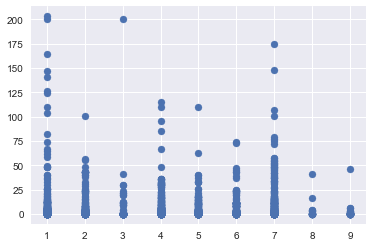

In [141]:
#plt.scatter(w['Class'],w['breast cancer'])

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(1,1), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(list(merged_train['text']))
frequencies = sum(sparse_matrix).toarray()[0]
f = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [17]:
f.reset_index(inplace = True)
f.sort_values('frequency', ascending = False,inplace= True)

In [18]:
f[:200]

,index,frequency
141067,the,1518614
105174,of,1248692
25371,and,938018
78908,in,920118
142705,to,568955
152115,with,390281
141012,that,291448
62357,for,277303
151603,were,261898
98884,mutations,238152


In [20]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(list(merged_train['text']))
frequencies = sum(sparse_matrix).toarray()[0]
h = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [23]:
h.reset_index(inplace = True)
h.sort_values('frequency',ascending = False, inplace = True)

In [24]:
h[:200]

,index,frequency
1421890,of the,250499
1055660,in the,176646
778630,et al,103515
2005058,to the,71646
2141950,wild type,56323
2154726,with the,55196
324113,and the,53191
1332618,mutations in,50388
866085,for the,42131
1935362,that the,39215


In [21]:
words = 'mutation, cancer, patient, protein,express, tumor, variant, kinase, domain, brca1, egfr activation, ras p53, exon ,growth, clinical, signaling, function, pten, phospharylation, residue, resistance, raf, pathway, alk, disease, receptor, missense, breast, braf, inhibit, lung, tyrosine, acid, induce, survival, proliferation, akt, imatinib, fusion, oncogenic, transcription, deleterous, flt3, melanoma, somatic, gefitinib, brct, myc, amplification, genomic, pathogenic, benign, p21, phosphatase, sp3b1, bat3'.split(', ')

In [41]:
merged_train_text = word_count(merged_train, words)

In [42]:
merged_test_text = word_count(merged_test, words)

In [43]:
merged_test_text.head()

,ID,Gene,Variation,text,text_freq,mutation,cancer,patient,"protein,express",tumor,...,brct,myc,amplification,genomic,pathogenic,benign,p21,phosphatase,sp3b1,bat3
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...,1,160,9,92,0,40,...,0,3,10,1,0,0,0,1,0,0
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...,1,18,26,5,0,30,...,1,36,1,0,1,0,0,0,0,0
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...,1,11,85,62,0,62,...,0,20,1,1,0,0,0,1,0,0
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...,1,12,19,20,0,42,...,1,84,6,14,1,0,1,0,0,0
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...,1,68,12,18,0,55,...,0,5,5,5,1,0,3,2,0,0
